In [7]:
import pandas as pd
import json

In [8]:
start_urls = []
with open('data/data_harvest.json','r') as sample:
    for line in sample:
        start_urls.append(json.loads(line.strip()))

In [9]:
start_urls

[{'url': 'https://www.paruvendu.fr/a/voiture-occasion/citroen/ds3/1260287851A1KVVOCIDS3',
  'status': 200,
  'location': 'le thuit-signol (27370)',
  'version': 'version ds3 puretech 82 bvm chic',
  'price': 'prix 11 000 €',
  'year': "année novembre 2015 le comparateur d'assurance pour cette citroën ds3",
  'mileage': 'kilométrage 46 000 km',
  'fuel_type': 'energie essence',
  'emission': 'emissions de co2 104 g/km',
  'fuel_usage': 'consommation mixte 4.5 litres / 100 km',
  'transmission': 'transmission manuelle',
  'door_nb': 'nombre de places 5 places',
  'technical_power': 'puissance fiscale 4 cv',
  'seat_nb': 'N/A',
  'actual_power': '82',
  'body_colour': 'N/A',
  'body_type': 'berline',
  'warranty': 'N/A',
  'control': 'N/A'},
 {'url': 'https://www.paruvendu.fr/a/voiture-occasion/mini/cooper/1260329381A1KVVOMCCOO',
  'status': 200,
  'location': '68000 colmar',
  'version': 'version 1.5 d 116 cooper pack chili bva',
  'price': 'prix 18 490 €',
  'year': "année octobre 2017 

In [10]:
f = open('data/brands.json')
brands = json.load(f)
brands

{'Abarth': ['500', '595', '695', 'Abarth 124 spider', 'F595', 'Grande Punto'],
 'Aiways': [],
 'Aleko': ['2141', 'Divers'],
 'Alfa-Romeo': [],
 'Alpina': ['B10', 'B12', 'B3', 'B4', 'B5', 'B6', 'D4', 'Xd3', 'Divers'],
 'Aro': ['Aro 10',
  'Aro 24',
  'Cross Lander',
  'Forester',
  'Pick-up',
  'Spartana',
  'Trapeurs',
  'Divers'],
 'Aston-Martin': [],
 'Audi': ['100',
  '200',
  '80',
  '90',
  'A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'Allroad',
  'Coupé',
  'E-TRON',
  'Q2',
  'Q3',
  'Q4',
  'Q5',
  'Q7',
  'Q8',
  'R8',
  'RS Q3',
  'RS3',
  'RS4',
  'RS5',
  'RS6',
  'S3',
  'S4',
  'S5',
  'S6',
  'S8',
  'SQ5',
  'SQ7',
  'SQ8',
  'TT',
  'TT S',
  'V8',
  'Divers'],
 'Austin': ['Autres', 'Mini'],
 'Autres': [],
 'Auverland': ['A3', 'A4', 'Divers'],
 'BMW': ['i3',
  'i4',
  'i8',
  'iX',
  'iX3',
  'M2',
  'M3',
  'M4',
  'M5',
  'M6',
  'Série 1',
  'Serie 2',
  'Série 3',
  'Série 4',
  'Série 5',
  'Série 6',
  'Série 7',
  'Série 8',
  'X1',
  'X2',
  

In [11]:
data = pd.DataFrame.from_dict(start_urls).iloc[:, 2:]

In [12]:
df = data.copy()

In [13]:
df.head()

,location,version,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,seat_nb,actual_power,body_colour,body_type,warranty,control
0,le thuit-signol (27370),version ds3 puretech 82 bvm chic,prix 11 000 €,année novembre 2015 le comparateur d'assurance...,kilométrage 46 000 km,energie essence,emissions de co2 104 g/km,consommation mixte 4.5 litres / 100 km,transmission manuelle,nombre de places 5 places,puissance fiscale 4 cv,N/A,82,N/A,berline,N/A,N/A
1,68000 colmar,version 1.5 d 116 cooper pack chili bva,prix 18 490 €,année octobre 2017 le comparateur d'assurance ...,kilométrage 52 800 km,energie diesel,N/A,N/A,transmission automatique,nombre de places 5 places,puissance fiscale 6 cv,N/A,116,gris foncé,N/A,N/A,N/A
2,chorges (05230),version mini 1.6i - 120 cooper,prix 8 700 €,année juin 2009 le comparateur d'assurance pou...,kilométrage 83 700 km,energie essence,emissions de co2 129 g/km,consommation mixte 5.4 litres / 100 km,transmission manuelle,nombre de places 4 places,puissance fiscale 6 cv,N/A,120,gris foncé,berline,N/A,N/A
3,liévin (62800),version duster blue dci 115 4x2 prestige,prix 19 800 €,année janvier 2022 le comparateur d'assurance ...,kilométrage 2 000 km,energie diesel,N/A,N/A,transmission manuelle,nombre de places 5 places,puissance fiscale 6 cv,N/A,115,blanc,4x4,N/A,N/A
4,clermont-ferrand (63100),version duster dci 110 4x4 black touch,prix 16 000 €,année février 2017 le comparateur d'assurance ...,kilométrage 67 000 km,energie diesel,emissions de co2 123 g/km,consommation mixte 4.7 litres / 100 km,transmission manuelle,nombre de places 5 places,puissance fiscale 6 cv,N/A,110,N/A,4x4,N/A,N/A


## Pré-nettoyage

In [14]:
import re 
import numpy as np

columns = ['location', 'price', 'year', 'mileage', 'emission', 'fuel_usage', 'door_nb', 'technical_power']

for col in columns:  
    df[col] = df[col].apply(lambda x: re.sub("[^\d\.]", "", f"{x}")).replace('', np.nan)
    try:
        df[col] = df[col].astype('float64').astype('Int64')
    except:
        df[col] = df[col].astype('float64')

In [15]:
df['year'] = df['year'].astype('string').str[:4].astype('Int64')
df['emission'] = df['emission'].astype('string', errors='ignore').str[1:4].astype('Int64', errors='ignore')

In [16]:
df['fuel_usage'] = df['fuel_usage'].astype('string', errors='ignore').str[:3].astype('float64', errors='ignore')

In [17]:
df.head()

,location,version,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,seat_nb,actual_power,body_colour,body_type,warranty,control
0,27370,version ds3 puretech 82 bvm chic,11000,2015,46000,energie essence,104,4.5,transmission manuelle,5,4,N/A,82,N/A,berline,N/A,N/A
1,68000,version 1.5 d 116 cooper pack chili bva,18490,2017,52800,energie diesel,<NA>,<NA>,transmission automatique,5,6,N/A,116,gris foncé,N/A,N/A,N/A
2,5230,version mini 1.6i - 120 cooper,8700,2009,83700,energie essence,129,5.4,transmission manuelle,4,6,N/A,120,gris foncé,berline,N/A,N/A
3,62800,version duster blue dci 115 4x2 prestige,19800,2022,2000,energie diesel,<NA>,<NA>,transmission manuelle,5,6,N/A,115,blanc,4x4,N/A,N/A
4,63100,version duster dci 110 4x4 black touch,16000,2017,67000,energie diesel,123,4.7,transmission manuelle,5,6,N/A,110,N/A,4x4,N/A,N/A


In [18]:
df.seat_nb.value_counts()

N/A    8269
Name: seat_nb, dtype: int64

In [19]:
del df['seat_nb']

In [20]:
df['body_colour'] = df['body_colour'].str.replace('>', '')

In [21]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts())

N/A                                                                   864
version 2.0l skyactiv-g 160 ch                                         45
version bluehdi 100 s s bvm6 gt                                        22
version privilege 1.4 boosterjet hybrid 129ch manuelle                 21
version 1.6 i-dtec 120 bvm6 2wd comfort                                19
                                                                     ... 
version 1.2 tce 115 lauréate 7 places                                   1
version 1.6 crdi 16v 2wd s&s 115 cv business                            1
version 1.2 t 116 ch distinctive - garantie mai 2022 reconductible      1
version 2.2 ed4 pure 4x2 mark i                                         1
version 2.0 td4 150 se 4x4 mark vi                                      1
Name: version, Length: 6059, dtype: int64
energie diesel        3630
energie essence       3537
energie hybride        499
N/A                    385
energie autres         160
energie e

### Création d'une colonne modèle

In [22]:
models = [element for key, value in brands.items() for element in value]
models

['500',
 '595',
 '695',
 'Abarth 124 spider',
 'F595',
 'Grande Punto',
 '2141',
 'Divers',
 'B10',
 'B12',
 'B3',
 'B4',
 'B5',
 'B6',
 'D4',
 'Xd3',
 'Divers',
 'Aro 10',
 'Aro 24',
 'Cross Lander',
 'Forester',
 'Pick-up',
 'Spartana',
 'Trapeurs',
 'Divers',
 '100',
 '200',
 '80',
 '90',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'Allroad',
 'Coupé',
 'E-TRON',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q7',
 'Q8',
 'R8',
 'RS Q3',
 'RS3',
 'RS4',
 'RS5',
 'RS6',
 'S3',
 'S4',
 'S5',
 'S6',
 'S8',
 'SQ5',
 'SQ7',
 'SQ8',
 'TT',
 'TT S',
 'V8',
 'Divers',
 'Autres',
 'Mini',
 'A3',
 'A4',
 'Divers',
 'i3',
 'i4',
 'i8',
 'iX',
 'iX3',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'Série 1',
 'Serie 2',
 'Série 3',
 'Série 4',
 'Série 5',
 'Série 6',
 'Série 7',
 'Série 8',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'Z1',
 'Z3',
 'Z4',
 'Z8',
 'Divers',
 'Free Climber',
 'Autres',
 'Baboulin',
 'DuneBuggy',
 'LM1',
 'Park Avenue',
 'Divers',
 'Allante',
 'ATS',
 'BLS',
 'CTS',
 'Eldora

In [25]:
for element in df['version']:
    for model in models:
        try:
            model = int(model)
        except:
            model = str(model)
            if model in element:
                print(f'{element}, {model.lower()}')

version 1.4 tdi80 collector sport 5p, i8
version 2.0 si4 pure bva, i4
version i30 1.4 pack clim, i3
version i30 1.4 pack clim, i30
version i30 sw 1.6 crdi 115 dct-7 business, i3
version i30 sw 1.6 crdi 115 dct-7 business, i30
version i30 1.4 crdi 90 blue drive pack inventive, i3
version i30 1.4 crdi 90 blue drive pack inventive, i30
version i30 1.4 crdi 90 blue drive pack inventive, i3
version i30 1.4 crdi 90 blue drive pack inventive, i30
version i30 1.4 t-gdi 140 dct-7 creative, i3
version i30 1.4 t-gdi 140 dct-7 creative, i30
version i30 1.4 t-gdi 140 dct-7 n line, i3
version i30 1.4 t-gdi 140 dct-7 n line, i30
version i30 1.4 16v clim blue drive, i3
version i30 1.4 16v clim blue drive, i30
version i20 1.1 crdi 75 creative, i20
version i20 1.2 85 pack go!, i20
version i20 1.2 75 edition #clim, i20
version i30 1.0 t-gdi 120 ibvm6 hybrid n line, i3
version i30 1.0 t-gdi 120 ibvm6 hybrid n line, i30
version i30 1.0 t-gdi 120 ibvm6 n line, i3
version i30 1.0 t-gdi 120 ibvm6 n line, i30


Il semblerait que ça soit plus compliqué que prévu, les seules valeurs observées sont des nombres.

### Enregistrement du dataframe

In [200]:
df.iloc[:, :-2].to_csv('data/paruvendu.csv', index=False, encoding="utf-8")

## Analyse de la forme des données

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
df.head()

,location,version,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,actual_power,body_colour,body_type,warranty,control
0,27370,version ds3 puretech 82 bvm chic,11000,2015,46000,energie essence,104,4.5,transmission manuelle,5,4,82,N/A,berline,N/A,N/A
1,68000,version 1.5 d 116 cooper pack chili bva,18490,2017,52800,energie diesel,<NA>,<NA>,transmission automatique,5,6,116,gris foncé,N/A,N/A,N/A
2,5230,version mini 1.6i - 120 cooper,8700,2009,83700,energie essence,129,5.4,transmission manuelle,4,6,120,gris foncé,berline,N/A,N/A
3,62800,version duster blue dci 115 4x2 prestige,19800,2022,2000,energie diesel,<NA>,<NA>,transmission manuelle,5,6,115,blanc,4x4,N/A,N/A
4,63100,version duster dci 110 4x4 black touch,16000,2017,67000,energie diesel,123,4.7,transmission manuelle,5,6,110,N/A,4x4,N/A,N/A


In [203]:
df.shape

(8269, 16)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location         8265 non-null   Int64 
 1   version          8269 non-null   object
 2   price            8258 non-null   Int64 
 3   year             8261 non-null   Int64 
 4   mileage          8265 non-null   Int64 
 5   fuel_type        8269 non-null   object
 6   emission         4699 non-null   string
 7   fuel_usage       1755 non-null   string
 8   transmission     8269 non-null   object
 9   door_nb          8225 non-null   Int64 
 10  technical_power  7894 non-null   Int64 
 11  actual_power     8269 non-null   object
 12  body_colour      8269 non-null   object
 13  body_type        8269 non-null   object
 14  warranty         8269 non-null   object
 15  control          8269 non-null   object
dtypes: Int64(6), object(8), string(2)
memory usage: 1.1+ MB


In [205]:
df.dtypes.value_counts()

object    8
Int64     6
string    2
dtype: int64

In [206]:
df.describe()

,location,price,year,mileage,door_nb,technical_power
count,8265.000000,8258.000000,8261.000000,8265.000000,8225.000000,7894.000000
mean,50606.116878,22717.762170,2016.721946,61677.887235,18.771185,8.525336
std,26653.536977,15782.510292,4.592028,53568.195512,1267.980524,10.427626
min,1000.000000,1.000000,1965.000000,1.000000,2.000000,3.000000
25%,31270.000000,12990.000000,2015.000000,19182.000000,5.000000,5.000000
50%,54400.000000,19299.500000,2018.000000,48952.000000,5.000000,7.000000
75%,73300.000000,27637.250000,2020.000000,90275.000000,5.000000,9.000000
max,97490.000000,199900.000000,2022.000000,396000.000000,115000.000000,560.000000


In [207]:
df.isna().sum()

location              4
version               0
price                11
year                  8
mileage               4
fuel_type             0
emission           3570
fuel_usage         6514
transmission          0
door_nb              44
technical_power     375
actual_power          0
body_colour           0
body_type             0
warranty              0
control               0
dtype: int64

<AxesSubplot:>

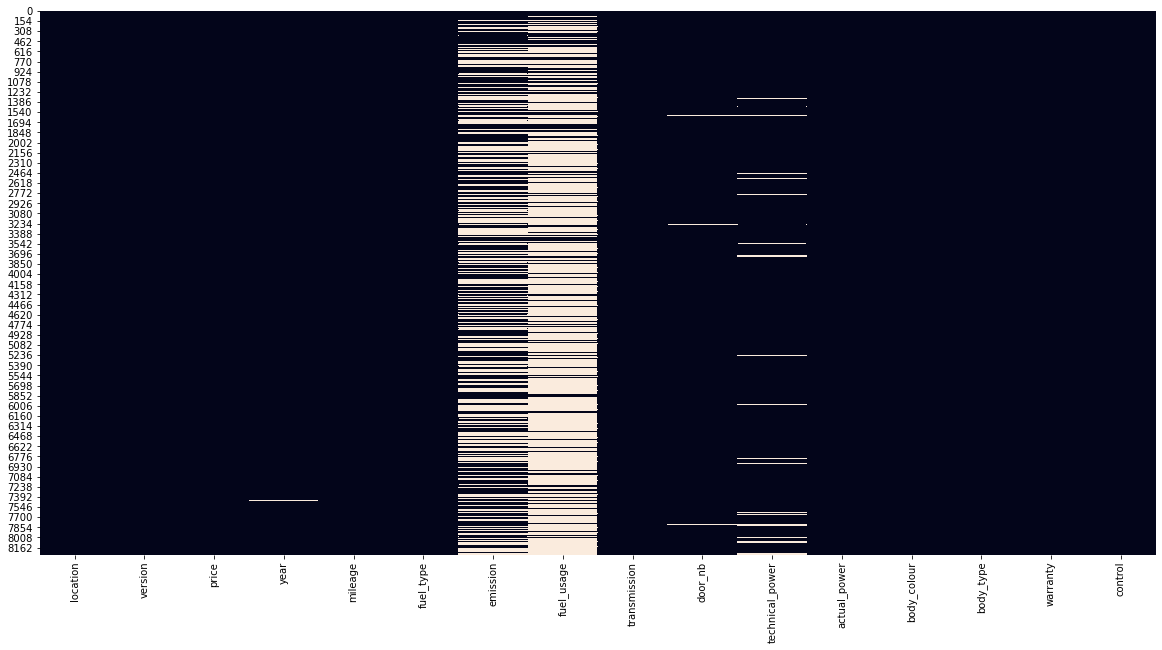

In [208]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [209]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

fuel_usage         0.787762
emission           0.431733
technical_power    0.045350
door_nb            0.005321
price              0.001330
year               0.000967
mileage            0.000484
location           0.000484
control            0.000000
warranty           0.000000
body_type          0.000000
body_colour        0.000000
actual_power       0.000000
transmission       0.000000
fuel_type          0.000000
version            0.000000
dtype: float64

## Analyse du Fond
### Examen de la colonne target

In [210]:
df.head()

,location,version,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,actual_power,body_colour,body_type,warranty,control
0,27370,version ds3 puretech 82 bvm chic,11000,2015,46000,energie essence,104,4.5,transmission manuelle,5,4,82,N/A,berline,N/A,N/A
1,68000,version 1.5 d 116 cooper pack chili bva,18490,2017,52800,energie diesel,<NA>,<NA>,transmission automatique,5,6,116,gris foncé,N/A,N/A,N/A
2,5230,version mini 1.6i - 120 cooper,8700,2009,83700,energie essence,129,5.4,transmission manuelle,4,6,120,gris foncé,berline,N/A,N/A
3,62800,version duster blue dci 115 4x2 prestige,19800,2022,2000,energie diesel,<NA>,<NA>,transmission manuelle,5,6,115,blanc,4x4,N/A,N/A
4,63100,version duster dci 110 4x4 black touch,16000,2017,67000,energie diesel,123,4.7,transmission manuelle,5,6,110,N/A,4x4,N/A,N/A


In [211]:
df['price'].describe()

count      8258.000000
mean      22717.762170
std       15782.510292
min           1.000000
25%       12990.000000
50%       19299.500000
75%       27637.250000
max      199900.000000
Name: price, dtype: float64

In [212]:
df['version'].value_counts(normalize=True)

N/A                                                                  0.104487
version 2.0l skyactiv-g 160 ch                                       0.005442
version bluehdi 100 s s bvm6 gt                                      0.002661
version privilege 1.4 boosterjet hybrid 129ch manuelle               0.002540
version 1.6 i-dtec 120 bvm6 2wd comfort                              0.002298
                                                                       ...   
version 1.0 firefly turbo 120 ch city cross-look                     0.000121
version 2.0 tsi 200ch gti dsg6 euro6d-t                              0.000121
version kadjar blue dci 115 business                                 0.000121
version golf 1.6 tdi 110 bluemotion technology fap allstar           0.000121
version sdrive18d 150ch m sport x gps camera radar av/ar ja19 led    0.000121
Name: version, Length: 6059, dtype: float64

In [213]:
# # Some data
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# fracs = [15, 30, 45, 10]

# # Make figure and axes
# fig, axs = plt.subplots(1, 2)

# # A standard pie plot
# axs[0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# # Shift the second slice using explode
# axs[1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
#               explode=(0, 0.1, 0, 0))

# plt.show()

In [214]:
df['version'].value_counts()

N/A                                                                  864
version 2.0l skyactiv-g 160 ch                                        45
version bluehdi 100 s s bvm6 gt                                       22
version privilege 1.4 boosterjet hybrid 129ch manuelle                21
version 1.6 i-dtec 120 bvm6 2wd comfort                               19
                                                                    ... 
version 1.0 firefly turbo 120 ch city cross-look                       1
version 2.0 tsi 200ch gti dsg6 euro6d-t                                1
version kadjar blue dci 115 business                                   1
version golf 1.6 tdi 110 bluemotion technology fap allstar             1
version sdrive18d 150ch m sport x gps camera radar av/ar ja19 led      1
Name: version, Length: 6059, dtype: int64

<AxesSubplot:ylabel='year'>

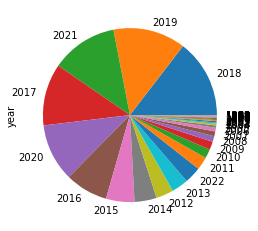

In [215]:
df['year'].value_counts().plot.pie()

<AxesSubplot:ylabel='fuel_type'>

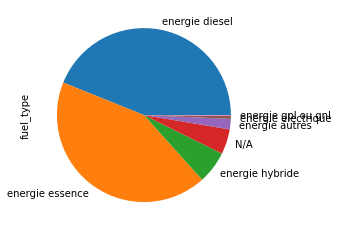

In [216]:
df['fuel_type'].value_counts().plot.pie()

<AxesSubplot:ylabel='price'>

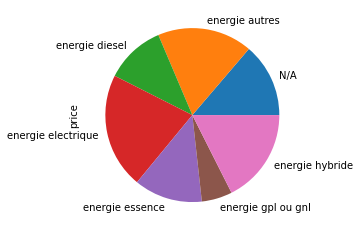

In [217]:
df.groupby('fuel_type')['price'].mean().plot.pie()

<AxesSubplot:ylabel='transmission'>

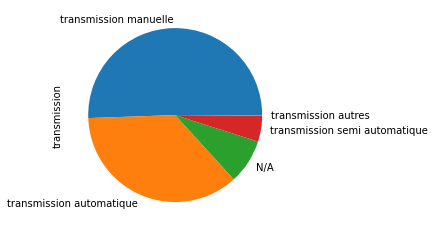

In [218]:
df['transmission'].value_counts().plot.pie()

<AxesSubplot:ylabel='price'>

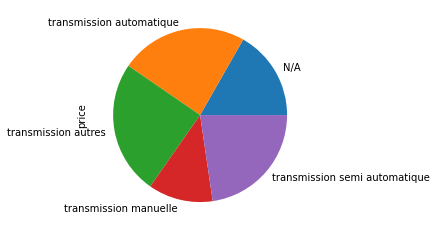

In [219]:
df.groupby('transmission')['price'].mean().plot.pie()

### Histogrames des variables continues

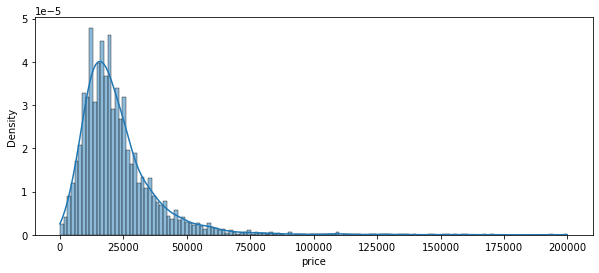

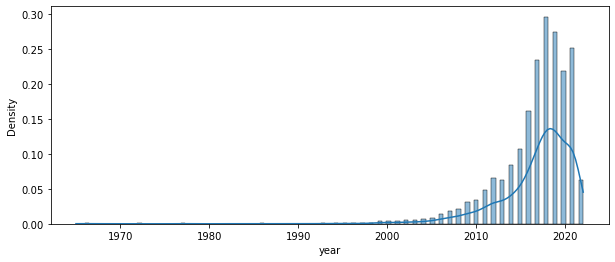

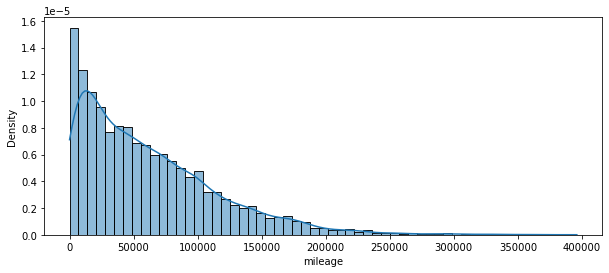

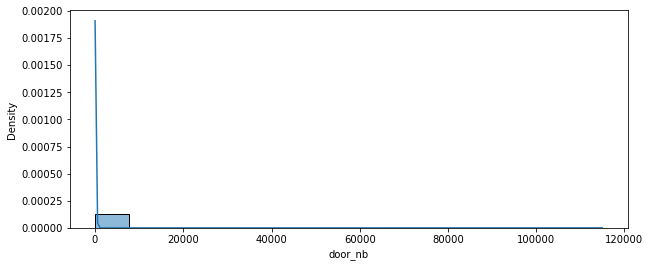

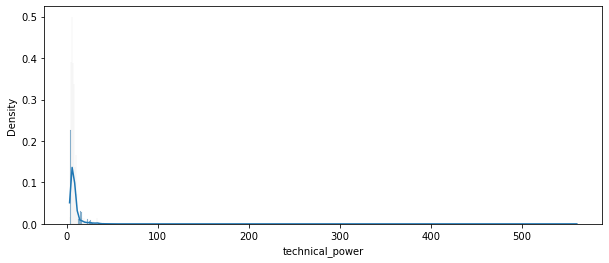

In [220]:
df_float = df[columns].astype('float64', errors='ignore').iloc[:, 1:]
for col in df_float.select_dtypes('float64'):
    plt.figure(figsize=(10,4))
    sns.histplot(df_float[col], kde=True, stat='density')

### Relation Variables / Variables

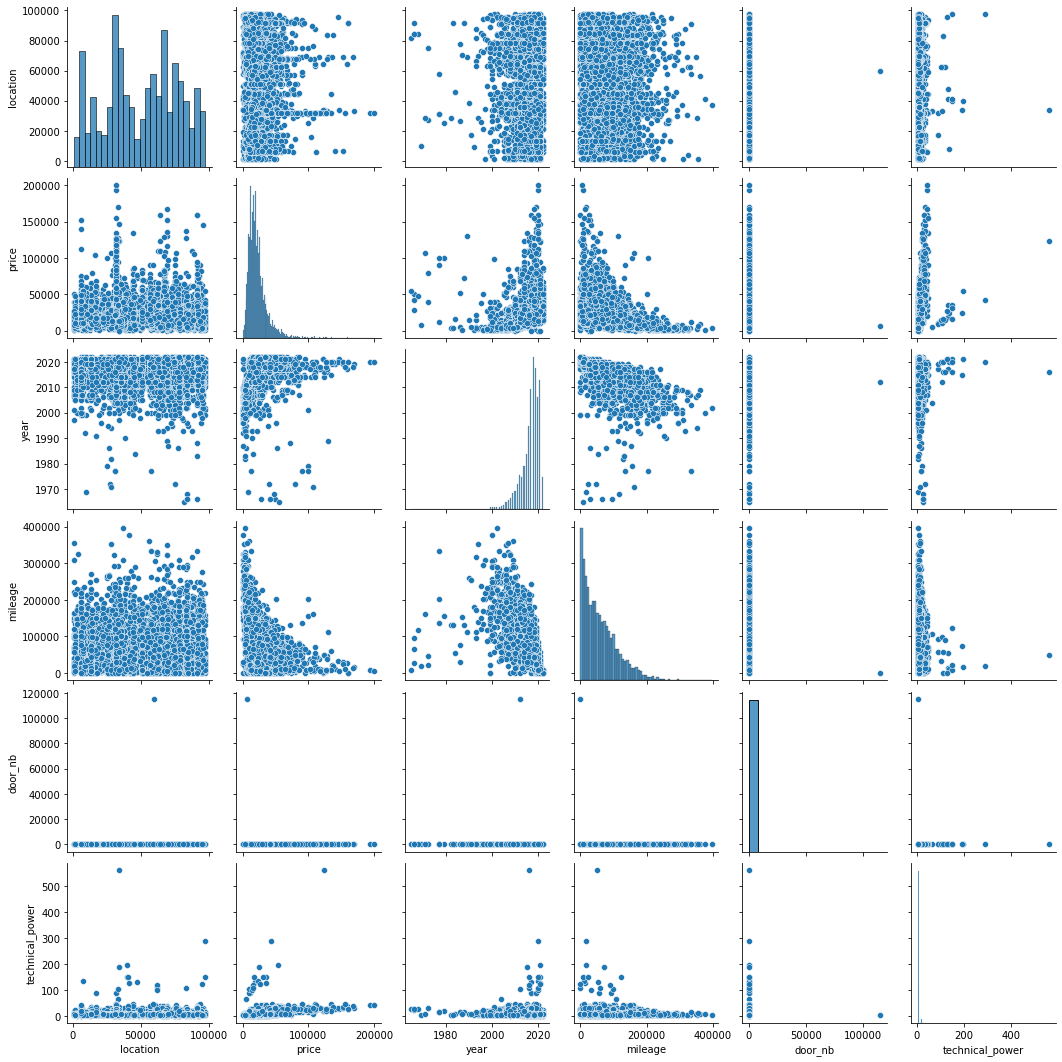

In [221]:
sns.pairplot(df)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

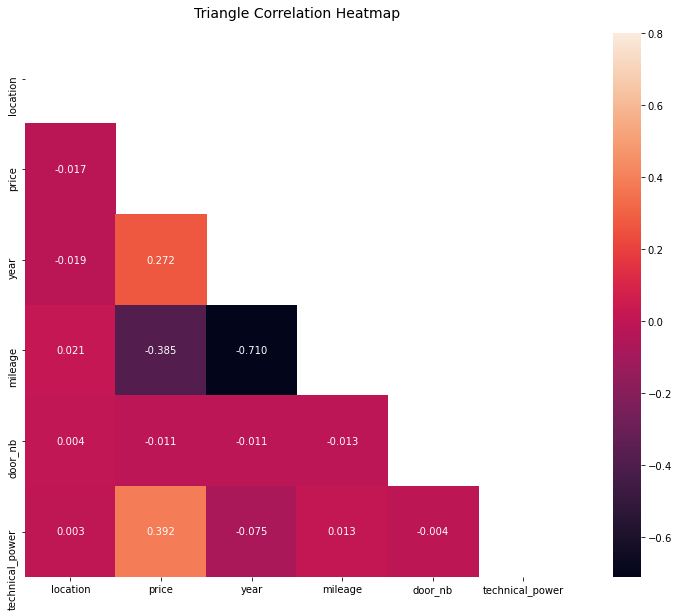

In [222]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16,10))
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, cbar=True, annot=True, fmt='.3f', annot_kws={'size': 10});
ax.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=16)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

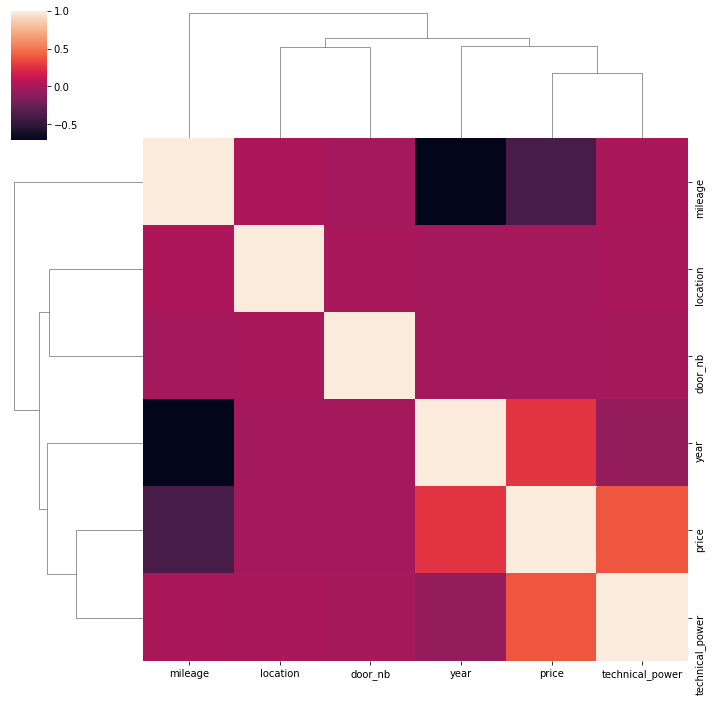

In [223]:
#correlation matrix
corrmat = df.corr()
sns.clustermap(corrmat, fmt='.1f');
ax.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=16)

In [224]:
df_scatter = df.copy()
df_scatter = df_scatter.dropna()

<AxesSubplot:xlabel='year', ylabel='price'>

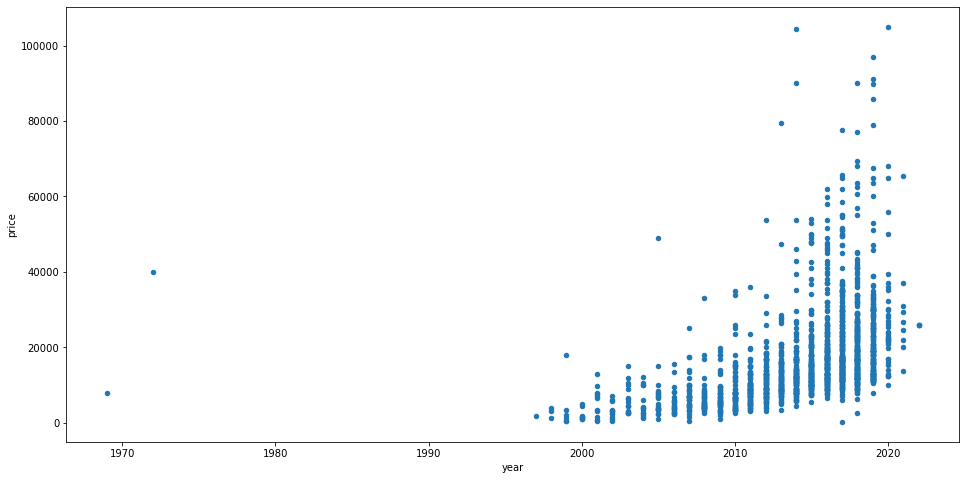

In [225]:
plt.rcParams["figure.figsize"] = (16,8)
df_scatter.plot.scatter(x = 'year', y = 'price')

<AxesSubplot:xlabel='mileage', ylabel='price'>

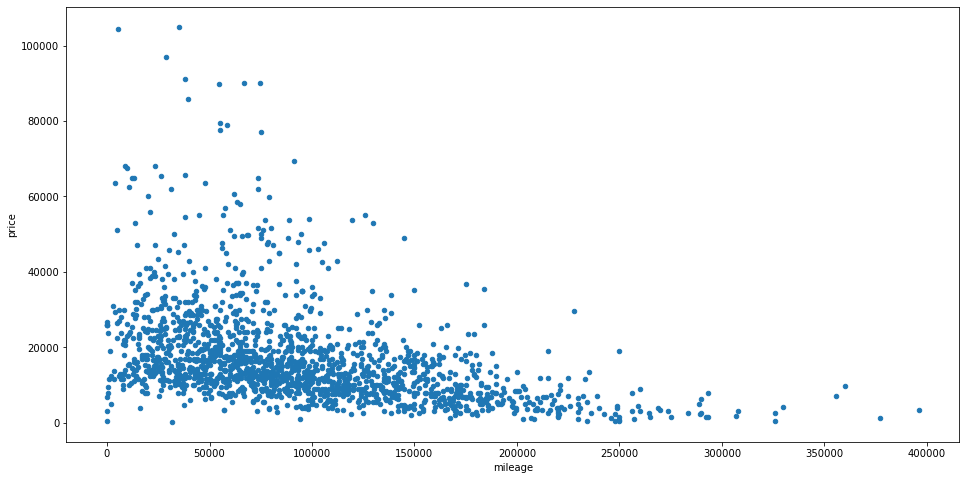

In [226]:
plt.rcParams["figure.figsize"] = (16,8)
df_scatter.plot.scatter(x = 'mileage', y = 'price')